In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ab_data.csv'

In [ ]:
df.shape

(294478, 5)

In [ ]:
type(df['converted'])

pandas.core.series.Series

In [ ]:
df['converted'].mean() * 100

np.float64(11.96591935560551)

In [ ]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [ ]:
df.query('group == "treatment" and landing_page != "new_page"')

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


In [ ]:
df.query('group == "control" and landing_page != "old_page"')

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [ ]:
df2t = df.query('group == "treatment" and landing_page == "new_page"')
df2c = df.query('group == "control" and landing_page == "old_page"')

In [ ]:
df2 = df2t.merge(df2c, how='outer')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,630000,2017-01-19 06:26:06.548941,treatment,new_page,0
1,630001,2017-01-16 03:16:42.560309,treatment,new_page,1
2,630002,2017-01-19 19:20:56.438330,control,old_page,0
3,630003,2017-01-12 10:09:31.510471,treatment,new_page,0
4,630004,2017-01-18 20:23:58.824994,treatment,new_page,0


In [ ]:
df2.shape

(290585, 5)

In [ ]:

df1 = pd.DataFrame({'key': [1, 2, 3], 'A': ['a1', 'a2', 'a3']})
df2 = pd.DataFrame({'key': [3, 4], 'B': ['b3', 'b4']})

for join_type in ['inner', 'left', 'right', 'outer']:
    print(f"\n--- {join_type.upper()} ---")
    print(df1.merge(df2, how=join_type, on='key'))



--- INNER ---
   key   A   B
0    3  a3  b3

--- LEFT ---
   key   A    B
0    1  a1  NaN
1    2  a2  NaN
2    3  a3   b3

--- RIGHT ---
   key    A   B
0    3   a3  b3
1    4  NaN  b4

--- OUTER ---
   key    A    B
0    1   a1  NaN
1    2   a2  NaN
2    3   a3   b3
3    4  NaN   b4


In [ ]:
# df2.describe()
df2['converted'].mean() * 100

np.float64(11.959708724499627)

In [ ]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [ ]:
sum(df2['user_id'].duplicated())

0

In [ ]:
df2[df2['user_id'].duplicated(keep='first')]

,user_id,timestamp,group,landing_page,converted
131713,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [ ]:
df2 = df2[~df2.user_id.duplicated(keep='first')]

In [ ]:
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

In [ ]:
df2.head(4)

,user_id,timestamp,group,landing_page,converted
0,630000,2017-01-19 06:26:06.548941,treatment,new_page,0
1,630001,2017-01-16 03:16:42.560309,treatment,new_page,1
2,630002,2017-01-19 19:20:56.438330,control,old_page,0
3,630003,2017-01-12 10:09:31.510471,treatment,new_page,0


In [ ]:
df2.groupby('group').count()['user_id']

group
control      145274
treatment    145310
Name: user_id, dtype: int64

In [ ]:
df2.converted.mean() * 100

np.float64(11.959708724499627)

In [ ]:
df2_control = df2.query('group == "control"')
df2_treamtment = df2.query('group == "treatment"')

In [ ]:
df2_control['converted'].mean() * 100

np.float64(12.03863045004612)

In [ ]:
df2_treamtment['converted'].mean() * 100

np.float64(11.880806551510565)

In [ ]:
df2['converted'].mean() * 100

np.float64(11.959708724499627)

In [ ]:
( 1 - df2['converted'].mean() ) * 100

np.float64(88.04029127550037)

In [ ]:
len(df2_treamtment)

145310

In [ ]:
new_page_converted = np.random.choice([1, 0], size=len(df2_treamtment), p=[df2.converted.mean(), (1 - df2.converted.mean())])

In [ ]:
x = np.array(new_page_converted)
z = x[x==0]
z.__len__()

127865

(array([127693.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17617.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

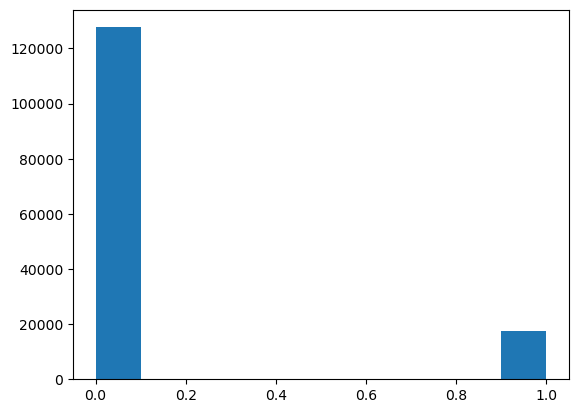

In [ ]:
plt.hist(new_page_converted)

In [ ]:
old_page_converted = np.random.choice([1, 0], size=len(df2_control), p=[df2.converted.mean(), (1 - df2.converted.mean())])

In [ ]:
new_page_converted = np.random.binomial(len(df2_treamtment), df2.converted.mean(), 10000) / len(df2_treamtment)
new_page_converted

array([0.12177414, 0.12162962, 0.11858785, ..., 0.12160897, 0.11889753,
       0.11945496])

In [ ]:
old_page_converted = np.random.binomial(len(df2_control), df2.converted.mean(), 10000) / len(df2_control)
old_page_converted

array([0.11950521, 0.11883062, 0.11894076, ..., 0.12000083, 0.11991822,
       0.1201798 ])

In [ ]:
p_diffs = new_page_converted - old_page_converted
p_diffs

array([ 0.00098859,  0.0014154 , -0.00125466, ...,  0.00253743,
       -0.00040806,  0.00025951])

In [ ]:
p_diffs.mean()

np.float64(-4.2151832411638666e-06)

In [ ]:
p_diffs

array([-8.55446380e-04,  2.09045985e-03,  1.36765189e-03, ...,
        3.20362639e-05,  1.66370569e-03, -3.65229079e-05])

In [ ]:
ab_data_diff = df2_treamtment['converted'] - df2_control['converted']

NameError: name 'df2_treamtment' is not defined

In [ ]:
ab_data_diff

np.float64(-0.0015782389853555567)

In [ ]:
(p_diffs > ab_data_diff).mean() * 100

np.float64(90.34)

In [ ]:
(p_diffs < ab_data_diff).mean() * 100

np.float64(9.66)

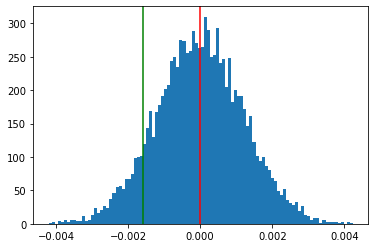

In [ ]:
plt.hist(p_diffs, bins=100)
low = ab_data_diff
higth = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=higth, color='r')